In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from genotype_db import GenotypeDB
from phenotype_framework import PhenotypeFramework as pf
from revolve2.core.database import open_database_sqlite
from revolve2.core.optimization import DbId
from revolve2.genotypes.cppnwin.genotype_schema import DbGenotype
from revolve2.core.optimization.ea.generic_ea import (
    DbEAOptimizer,
    DbEAOptimizerGeneration,
    DbEAOptimizerIndividual,
)
from sqlalchemy.future import select

## Query DB

In [2]:
database: str = "/home/oliver/revolve2/examples/optimize_modular/database"
db_id: DbId = DbId("optmodular")

# open the database
db = open_database_sqlite(database)
# read the optimizer data into a pandas dataframe

df = pd.read_sql(
    select(
        DbEAOptimizer,
        DbEAOptimizerGeneration,
        DbEAOptimizerIndividual,
        DbGenotype,
        GenotypeDB

    ).filter(
        (DbEAOptimizer.db_id == db_id.fullname)
        & (DbEAOptimizerGeneration.ea_optimizer_id == DbEAOptimizer.id)
        & (DbEAOptimizerIndividual.ea_optimizer_id == DbEAOptimizer.id)
        & (DbEAOptimizerIndividual.genotype_id == GenotypeDB.id)
        & (GenotypeDB.body_id == DbGenotype.id)
        & (
            DbEAOptimizerGeneration.individual_id
            == DbEAOptimizerIndividual.individual_id
        )
    ),
    db,
)

## Sandbox: Block & Hinges Plot

In [3]:
df["blocks"], df["hinges"] = zip(*df.serialized_multineat_genome.apply(pf.get_blocks_hinges_amount))

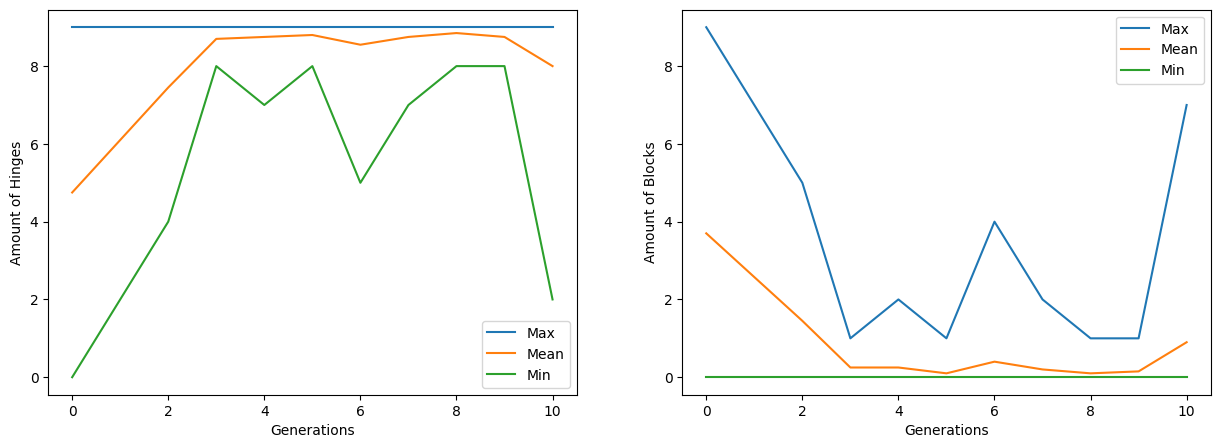

In [4]:
# calculate max min avg
hngs = (
    df[["generation_index", "hinges"]]
    .groupby(by="generation_index")
    .describe()["hinges"]
)

blcks = (
    df[["generation_index", "blocks"]]
    .groupby(by="generation_index")
    .describe()["blocks"]
)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.set_xlabel("Generations")
ax1.set_ylabel("Amount of Hinges")
ax1.plot(hngs[["max", "mean", "min"]], label= ["Max", "Mean", "Min"])
ax1.legend()

ax2.set_xlabel("Generations")
ax2.set_ylabel("Amount of Blocks")
ax2.plot(blcks[["max","mean","min"]], label= ["Max", "Mean", "Min"])
ax2.legend()

## Sandbox: Novelty Metric

In [5]:
tests = ['yates-chi-squared', 'chi-squared', 'hellinger-dist', 'manhattan-dist', 'euclidian-dist', 'chybyshev_distance', 'pcc']

In [6]:
generation_groups = df[["generation_index", "serialized_multineat_genome"]].groupby(by="generation_index")
genome_groups = [data["serialized_multineat_genome"].values for _, data in generation_groups]


for test in tests:
    print(f"\n Test: {test}")
    novelty_scores = pf.get_novelty_population(genome_groups[2], normalization="clipping", test=test)
    print(novelty_scores)


 Test: yates-chi-squared
[76410977.6270037, 76406638.10055669, 76417227.66987793, 76370933.4465698, 76330125.78280684, 76436761.00717063, 76351248.62296829, 76399601.78224346, 76447691.85779041, 76348137.11337069, 76452372.66553594, 76343456.30562516, 76343456.30562516, 76343456.30562516, 76265255.40096614, 76261402.72990611, 76486350.14949998, 76289078.63423865, 76352988.44145703, 76352988.44145703]

 Test: chi-squared


/home/oliver/Thesis/analysis/phenotype_framework.py:185: RuntimeWarning: invalid value encountered in divide
  norm = lambda x: (x - min_val) / (max_val - min_val)


[106.89518556660668, 409748.09401584376, 25107.02541972224, 27507.094708744862, 388167.4805771407, 52458.09363714854, 71067.98825969847, 314073.93605832197, 79433.43154976718, 92117.71327667488, 81408.6392282302, 90142.50559821186, 90142.50559821186, 90142.50559821186, 178751.03509035782, 180267.43111011008, 143059.62323603145, 244369.25154399854, 125595.85023926198, 125595.85023926198]

 Test: hellinger-dist
[0.2882794099577169, 0.5293224164947562, 0.2882794099577169, 0.25655386413184067, 0.5004582570557556, 0.2882794099577169, 0.24430347277503608, 0.5293224164947562, 0.2882794099577169, 0.24430347277503608, 0.2882794099577169, 0.24430347277503608, 0.24430347277503608, 0.24430347277503608, 0.5295702622405827, 0.5004582570557556, 0.2882794099577169, 0.3735924261719704, 0.24430347277503608, 0.24430347277503608]

 Test: manhattan-dist
[0.4791946115110419, 0.8191095916852144, 0.4791946115110419, 0.43981445634789756, 0.8036690199616077, 0.4791946115110419, 0.41380165923037265, 0.8191095916


 Test: yates-chi-squared
runtime: 1144.726226ms
Avg STD: 0.24210398506881145

 Test: chi-squared


/home/oliver/Thesis/analysis/phenotype_framework.py:185: RuntimeWarning: invalid value encountered in divide
  norm = lambda x: (x - min_val) / (max_val - min_val)


runtime: 1034.785416ms
Avg STD: 0.24474618245830496

 Test: hellinger-dist


/home/oliver/Thesis/analysis/phenotype_framework.py:185: RuntimeWarning: invalid value encountered in divide
  norm = lambda x: (x - min_val) / (max_val - min_val)


runtime: 683.131498ms
Avg STD: 0.28750308802429825

 Test: manhattan-dist


/home/oliver/Thesis/analysis/phenotype_framework.py:185: RuntimeWarning: invalid value encountered in divide
  norm = lambda x: (x - min_val) / (max_val - min_val)


runtime: 703.068082ms
Avg STD: 0.27111068774463865

 Test: euclidian-dist


/home/oliver/Thesis/analysis/phenotype_framework.py:185: RuntimeWarning: invalid value encountered in divide
  norm = lambda x: (x - min_val) / (max_val - min_val)


runtime: 766.215368ms
Avg STD: 0.2844397374179131

 Test: chybyshev_distance


/home/oliver/Thesis/analysis/phenotype_framework.py:185: RuntimeWarning: invalid value encountered in divide
  norm = lambda x: (x - min_val) / (max_val - min_val)


runtime: 681.415935ms
Avg STD: 0.3139795819951454

 Test: pcc


/home/oliver/Thesis/analysis/phenotype_framework.py:185: RuntimeWarning: invalid value encountered in divide
  norm = lambda x: (x - min_val) / (max_val - min_val)


runtime: 1811.891831ms
Avg STD: 0.30726099514076555


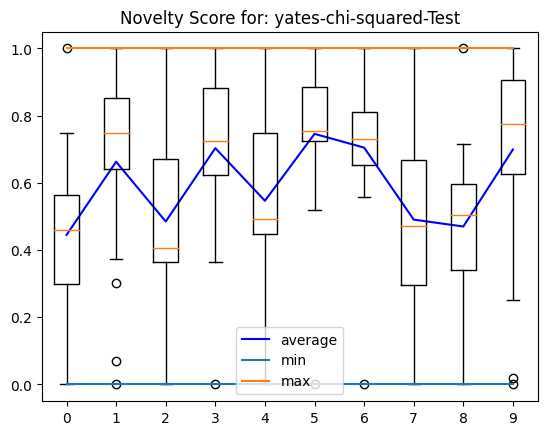

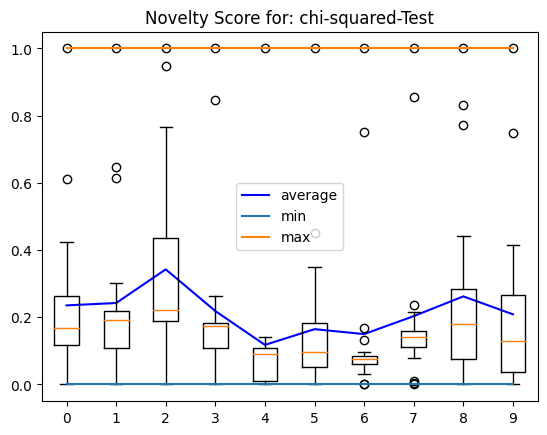

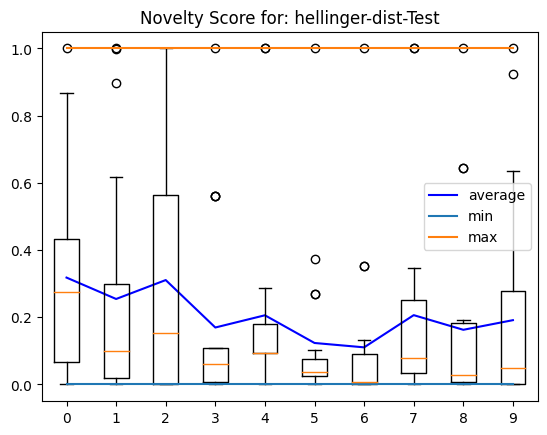

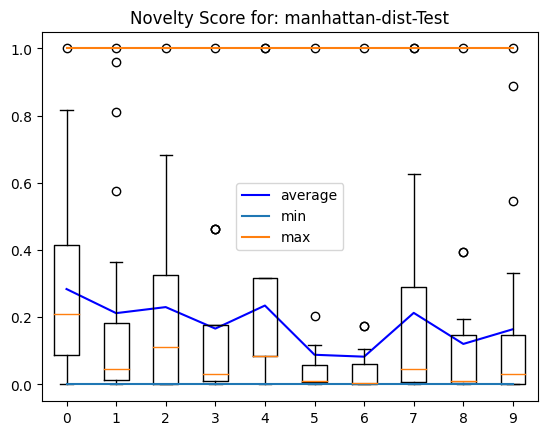

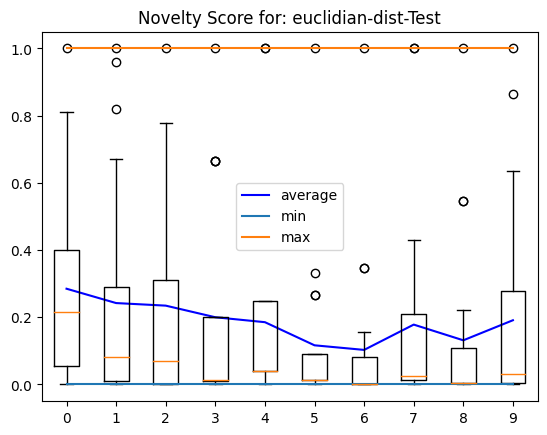

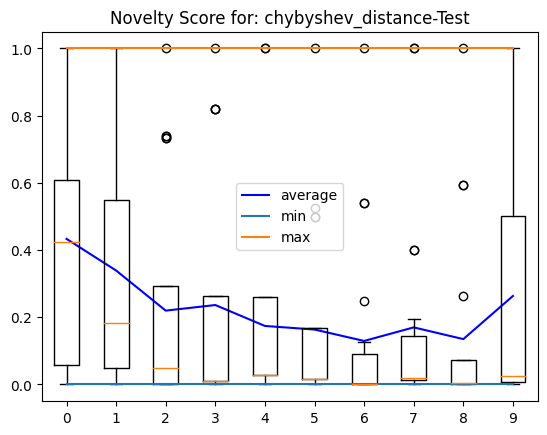

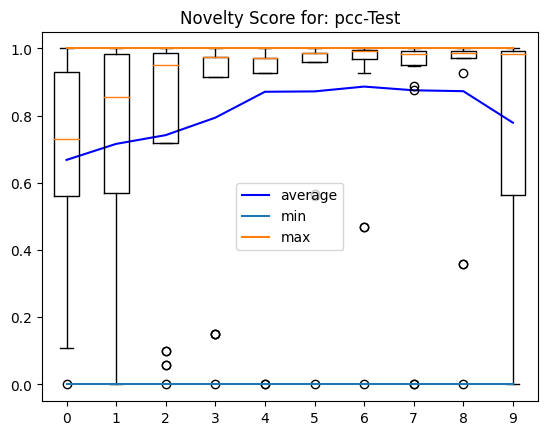

In [7]:
from numpy import std
from time import time_ns


def normalize_list(lst:list)-> list:
    vmin = min(lst)
    vmax = max(lst)
    return [(x-vmin)/(vmax-vmin) for x in lst]



for test in tests:

    print(f"\n Test: {test}")
    start = time_ns()
    data = []
    for generation in genome_groups:
        novelty_scores = pf.get_novelty_population(generation, normalization="clipping", test=test)
        data.append(normalize_list(novelty_scores))
    print(f"runtime: {(time_ns()-start)/1_000_000}ms")


    avg, vmax, vmin, vstd = [],[],[], []
    for sublist in data:
        vmax.append(max(sublist))
        vmin.append(min(sublist))
        avg.append(sum(sublist)/len(sublist))
        vstd.append(std(sublist))



    fig, ax = plt.subplots()
    ax.set_title(f"Novelty Score for: {test}-Test")
    ax.plot(avg, label="average", color="blue")
    ax.boxplot(data, positions=list(range(len(data))))

    ax.plot(vmin, label="min")
    ax.plot(vmax, label="max")
    ax.legend()
    print(f"Avg STD: {sum(vstd)/len(vstd)}")